# 1. Business Understanding
## Analyzing Factors Influencing Global Life Expectancy

1. Introduction

Life expectancy at birth, a cornerstone metric of public health, encapsulates the interplay of socioeconomic, environmental, and healthcare factors that shape population health outcomes. Understanding the determinants of life expectancy is critical for informing evidence-based health policies and addressing global health disparities. This research seeks to investigate the key factors—such as health expenditure, gross domestic product (GDP), immunization coverage, and lifestyle indicators (e.g., body mass index, alcohol consumption)—that influence life expectancy across 193 countries, using data from the World Health Organization (WHO) spanning 2000 to 2015. By leveraging advanced data analytics and visualization techniques, this study aims to uncover patterns, quantify relationships, and highlight regional variations in life expectancy, contributing to the broader discourse on global health equity.

2. Significance

-Provide actionable insights for policymakers to prioritize interventions (e.g., increasing health expenditure or immunization coverage).

-Demonstrate the application of data science techniques (e.g., statistical analysis, data visualization) in addressing real-world public health challenges.

3. The primary stakeholders

-Public Health Researchers: Seeking evidence on the determinants of life expectancy to inform future studies.

-Health Policymakers: Interested in data-driven recommendations to improve national and regional health outcomes.

-Global Health Organizations: Such as WHO or the World Bank, which can use findings to guide resource allocation.

-Academic Community: Including lecturers and peers, who will evaluate the rigor and clarity of the research output.

# 2. Data Understanding

In [1]:
# installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
data = pd.read_csv('Life_expectancy_Data.csv')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Checking column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 3. Exploratory Data Analysis (EDA)
This is to explore the Life Expectancy (WHO) dataset to understand its characteristics, including variable distributions, relationships, missing values, and potential outliers.

In [4]:
# Dataset Dimensions and Preview
print(f"Shape: {data.shape}")
data.head()


Shape: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Data Types and Non-Null Counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# Statistics for Numerical Columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [ ]:
# Checking for Missing Values
missing = data.isnull().sum()
missing[missing > 0]


Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
#  Percentage of Missing Values per Column
missing_percent = data.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 thinness 5-9 years                 1.157250
 thinness  1-19 years               1.157250
 BMI                                1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64

In [9]:
# Drop Duplicates (if any)
data.drop_duplicates(inplace=True)


In [10]:
# Unique Values per Column
data.nunique()


Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [11]:
# Summary Statistics for Key Variables (Life expectancy, GDP, Total expenditure, BMI, Diphtheria, Measles, Alcohol, Adult Mortality, Status)
key_vars = ['Life expectancy ', 'GDP', 'Total expenditure', 'Diphtheria ', 
            'Measles ', 'Alcohol', 'Adult Mortality', 'Status']
data[key_vars].describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
GDP,2490.0,NaN,NaN,NaN,7483.158469,14270.169342,1.68135,463.935626,1766.947595,5910.806335,119172.7418
Total expenditure,2712.0,NaN,NaN,NaN,5.93819,2.49832,0.37,4.26,5.755,7.4925,17.6
Diphtheria,2919.0,NaN,NaN,NaN,82.324084,23.716912,2.0,78.0,93.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
 # Count Unique Countries and Years
print("Number of unique countries:", data['Country'].nunique())
print("Year range:", data['Year'].min(), "-", data['Year'].max())


Number of unique countries: 193
Year range: 2000 - 2015


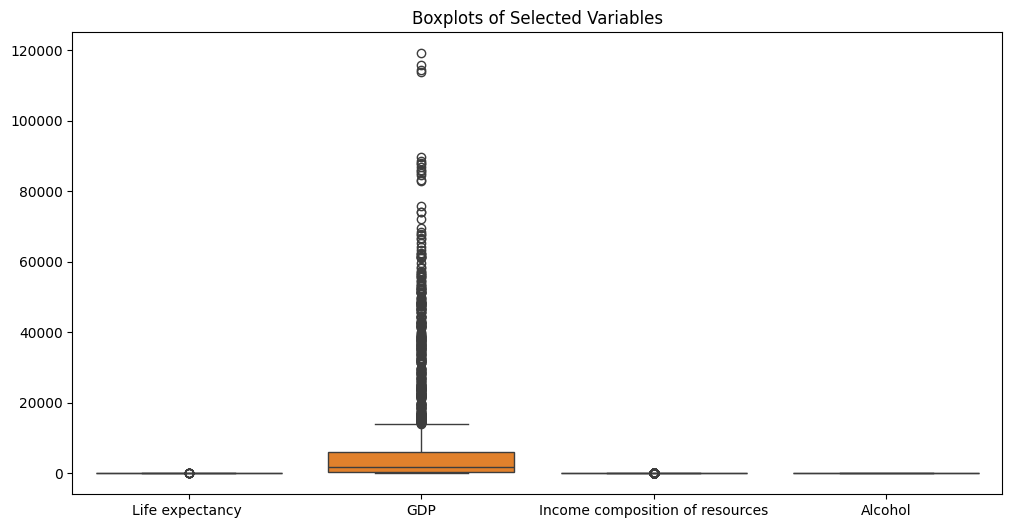

In [13]:
# Check for Outliers using Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Life expectancy ', 'GDP', 'Income composition of resources', 'Alcohol']])
plt.title("Boxplots of Selected Variables")
plt.show()


Distribution is tight with a few outliers on the lower side (countries with very low life expectancy).

Most countries fall within a reasonable life expectancy range (around 60–80 years).

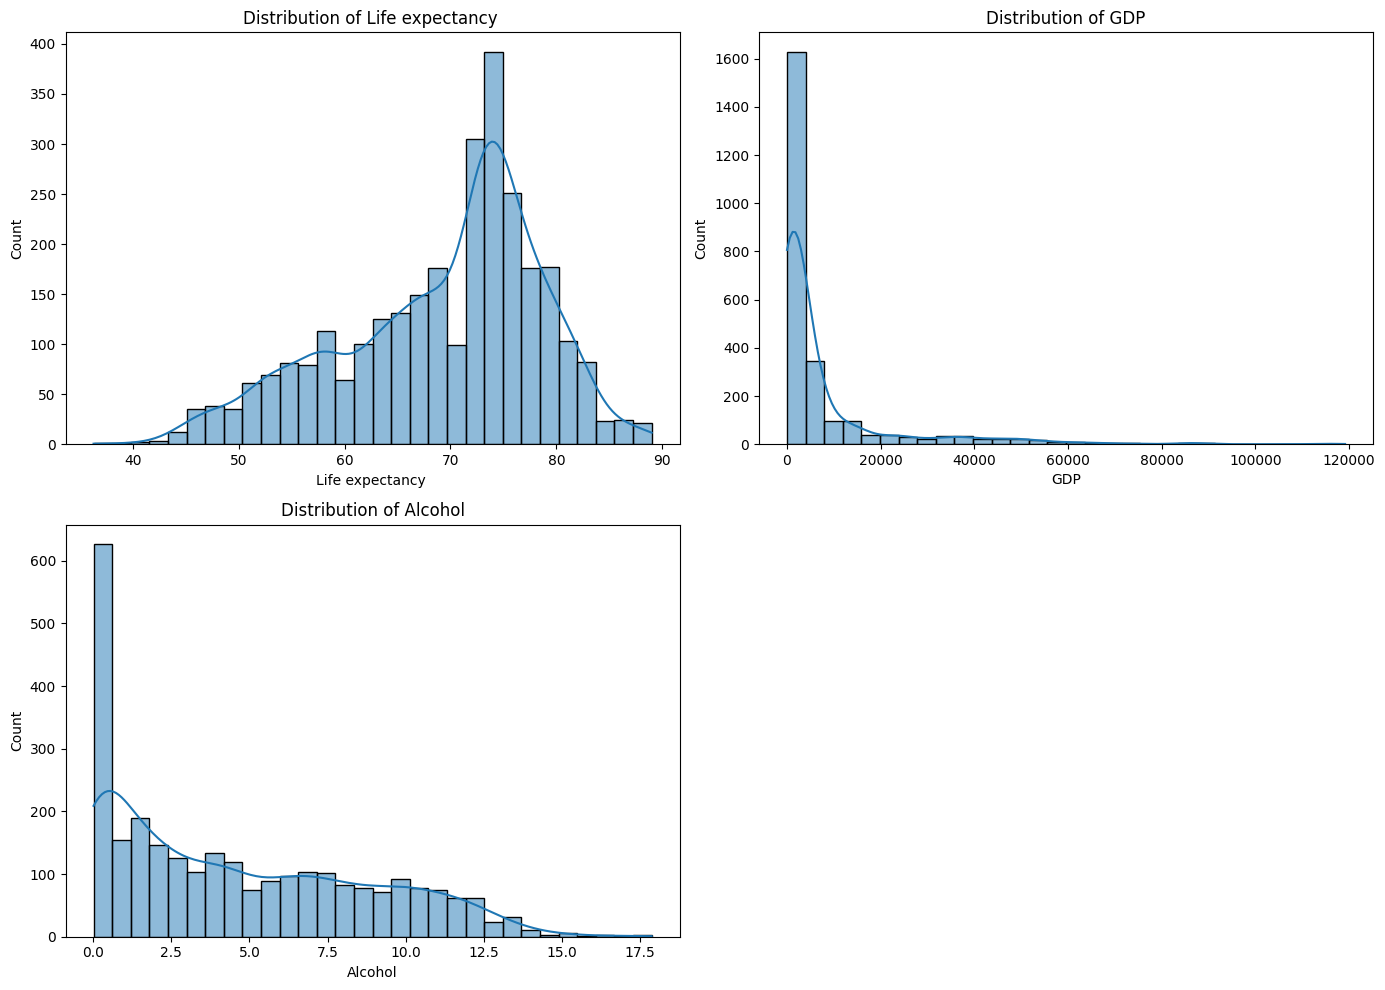

In [14]:
# Distribution Plots for Key Variables
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Life expectancy ', 'GDP', 'Alcohol'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


1. Life Expectancy; -Most countries have a life expectancy between 65 and 80 years.
- Few countries have very low life expectancy (< 50).
2. GDP; -Most countries have low to moderate GDP, with a few outliers (rich countries) having very high GDP.
3. -Alcohol Consumption; A large number of countries have low alcohol consumption (near 0–2 units).
- A smaller number of countries have moderate to high alcohol use.

# 4. Data Preprocessing.
Prepare the data for modeling by cleaning, transforming, and engineering it to make it suitable for logistic regression. 

In [15]:
# Only Required Columns
data.columns = data.columns.str.strip()

selected_columns = ['Life expectancy', 'Status', 'GDP', 'Total expenditure', 'Adult Mortality',
                    'Diphtheria', 'HIV/AIDS', 'BMI', 'Income composition of resources', 'Schooling']

df = data[selected_columns].copy()

Handling Missing Values

In [16]:
#Checking missing values
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 Life expectancy                     10
Status                               0
GDP                                448
Total expenditure                  226
Adult Mortality                     10
Diphtheria                          19
HIV/AIDS                             0
BMI                                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [17]:
# Apply missing value handling
# 1. Dropping rows with missing 'Life expectancy' or 'Adult Mortality'
df = df.dropna(subset=['Life expectancy', 'Adult Mortality'])

# 2. Filling GDP and Income composition of resources by 'Status' group mean
df['GDP'] = df.groupby('Status')['GDP'].transform(lambda x: x.fillna(x.mean()))
df['Income composition of resources'] = df.groupby('Status')['Income composition of resources'].transform(lambda x: x.fillna(x.mean()))

# 3. Filling'Total expenditure', 'BMI', 'Diphtheria', 'Schooling' with median (grouped if needed)
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Diphtheria'] = df['Diphtheria'].fillna(df['Diphtheria'].median())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].median())


In [18]:
# Checking for any remaining missing values in the selected columns
print("Missing values per column after handling:\n", df.isnull().sum())


Missing values per column after handling:
 Life expectancy                    0
Status                             0
GDP                                0
Total expenditure                  0
Adult Mortality                    0
Diphtheria                         0
HIV/AIDS                           0
BMI                                0
Income composition of resources    0
Schooling                          0
dtype: int64


Checking for duplicate

In [19]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Dropping duplicates if any
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Shape after removing duplicates: (2928, 10)


Handling Outliers

In [20]:
# Handling Outliers using IQR
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Checking number of outliers in each numerical column
for col in df.select_dtypes(include=np.number).columns:
    outlier_count = detect_outliers_iqr(col)
    print(f"{col}: {outlier_count} outliers")

Life expectancy: 10 outliers
GDP: 459 outliers
Total expenditure: 49 outliers
Adult Mortality: 82 outliers
Diphtheria: 297 outliers
HIV/AIDS: 542 outliers
BMI: 0 outliers
Income composition of resources: 130 outliers
Schooling: 75 outliers


Since this is a health-related, global dataset where variability is meaningful (e.g., high HIV in some countries, low in others), I recommend:
To keep the outliers for now, especially because:

They may contain important signal (e.g., countries with very high HIV/AIDS affecting life expectancy).



Data Transformation

In [21]:
# Data Transformation
from sklearn.preprocessing import MinMaxScaler

# 4.7.1 Encode 'Status' column
data_encoded = data.copy()
data_encoded['Status'] = data_encoded['Status'].map({'Developing': 0, 'Developed': 1})

# 4.7.2 Apply Min-Max Scaling to all numeric features
scaler = MinMaxScaler()
numerical_columns = ['Life expectancy', 'GDP', 'Total expenditure', 'Adult Mortality',
                     'Diphtheria', 'HIV/AIDS', 'BMI', 'Income composition of resources', 'Schooling']

# Fit and transform the numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Preview transformed dataset
data_encoded.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,0.544592,0.362881,62,0.01,71.279624,65.0,1154,...,6.0,0.452118,0.649485,0.0,0.004889,33736494.0,17.2,17.3,0.505274,0.487923
1,Afghanistan,2014,0,0.447818,0.373961,64,0.01,73.523582,62.0,492,...,58.0,0.453279,0.618557,0.0,0.005127,327582.0,17.5,17.5,0.502110,0.483092
2,Afghanistan,2013,0,0.447818,0.369806,66,0.01,73.219243,64.0,430,...,62.0,0.450377,0.639175,0.0,0.005287,31731688.0,17.7,17.7,0.495781,0.478261
3,Afghanistan,2012,0,0.440228,0.375346,69,0.01,78.184215,67.0,2787,...,67.0,0.473012,0.670103,0.0,0.005608,3696958.0,17.9,18.0,0.488397,0.473430
4,Afghanistan,2011,0,0.434535,0.379501,71,0.01,7.097109,68.0,3013,...,68.0,0.435287,0.680412,0.0,0.000519,2978599.0,18.2,18.2,0.478903,0.458937


##### Correlation Analysis
To measure how strongly each independent variable is linearly related to the target variable Life expectancy.

Correlation with Life Expectancy:
Life expectancy                    1.00
Schooling                          0.75
Income composition of resources    0.72
BMI                                0.57
Status                             0.48
Diphtheria                         0.48
Polio                              0.47
GDP                                0.46
Alcohol                            0.40
percentage expenditure             0.38
Hepatitis B                        0.26
Total expenditure                  0.22
Year                               0.17
Population                        -0.02
Measles                           -0.16
infant deaths                     -0.20
under-five deaths                 -0.22
thinness 5-9 years                -0.47
thinness  1-19 years              -0.48
HIV/AIDS                          -0.56
Adult Mortality                   -0.70
Name: Life expectancy, dtype: float64


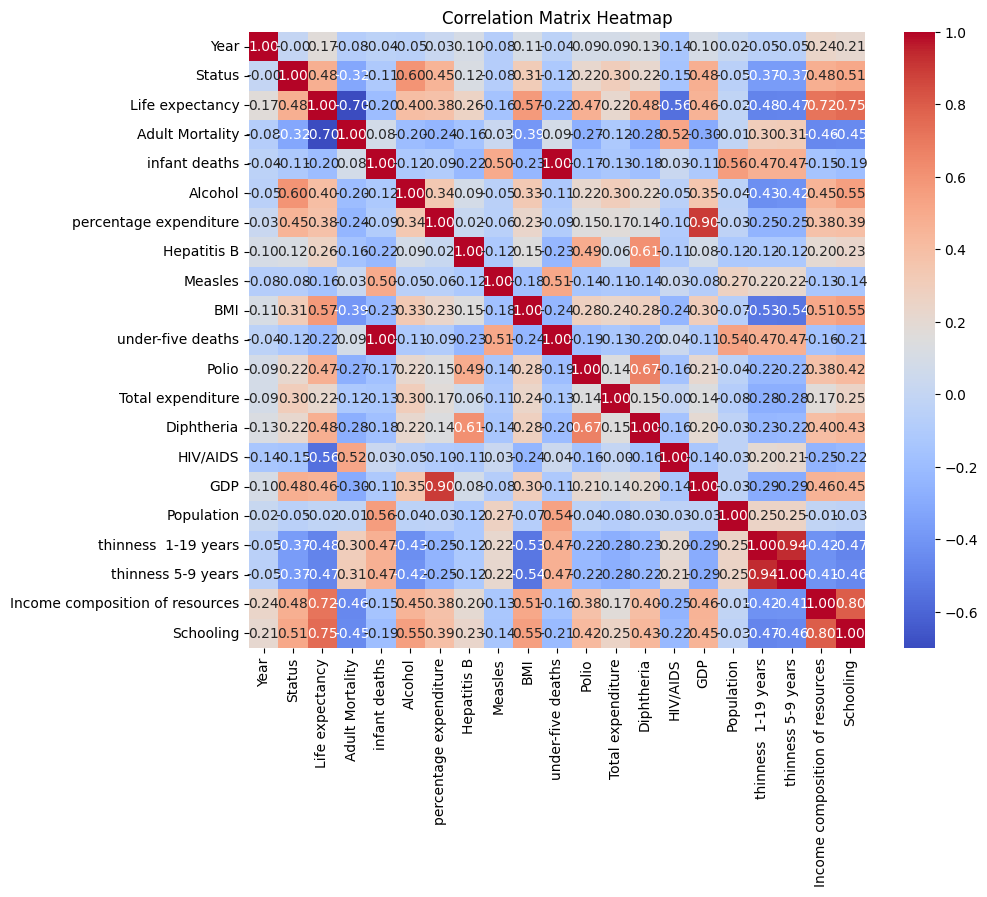

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns like 'Country' and 'Year'
numeric_data = data_encoded.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_data.corr().round(2)

# Show correlation of all variables with Life expectancy
print("Correlation with Life Expectancy:")
print(correlation_matrix['Life expectancy'].sort_values(ascending=False))

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Interpretation:
Education (Schooling), Resources, and Immunization are strong protective factors.

Disease burden, poverty, and malnutrition are significant risk factors.

Variables like Status and GDP act as proxies for development level and health system strength.

### Visualizations on variables affecting Global Life Expectancy

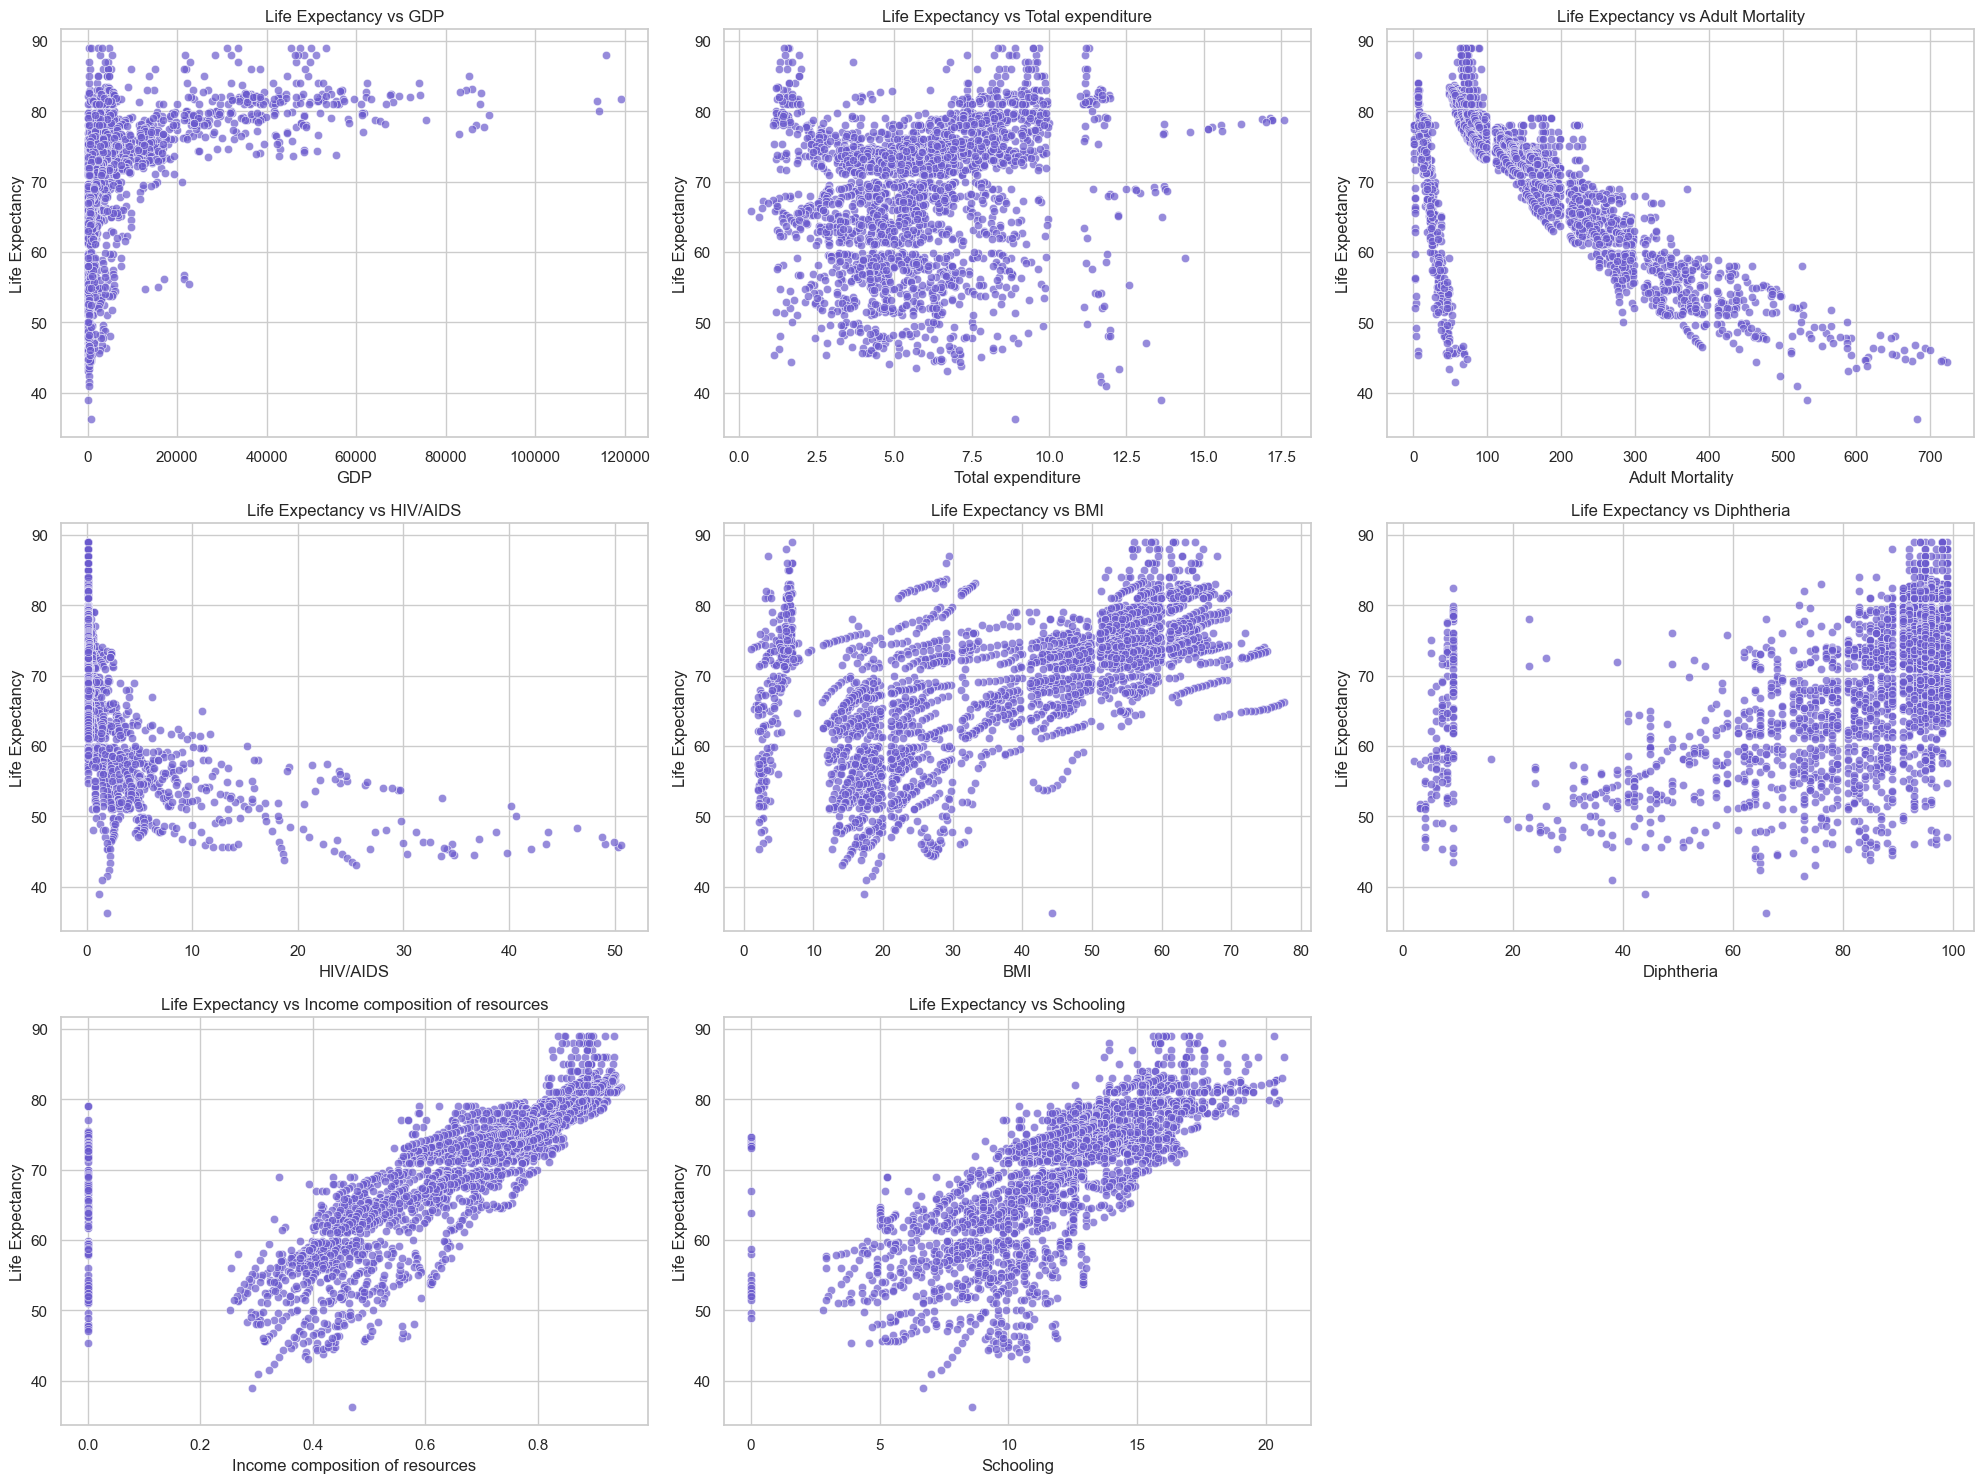

In [23]:
# Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# List of numeric predictors you selected
predictors = [
    'GDP', 'Total expenditure', 'Adult Mortality', 'HIV/AIDS',
    'BMI', 'Diphtheria', 'Income composition of resources', 'Schooling'
]

# Plot scatter plots in a grid
for i, var in enumerate(predictors):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=data[var], y=data['Life expectancy'], color='slateblue', alpha=0.7)
    plt.title(f'Life Expectancy vs {var}')
    plt.xlabel(var)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()


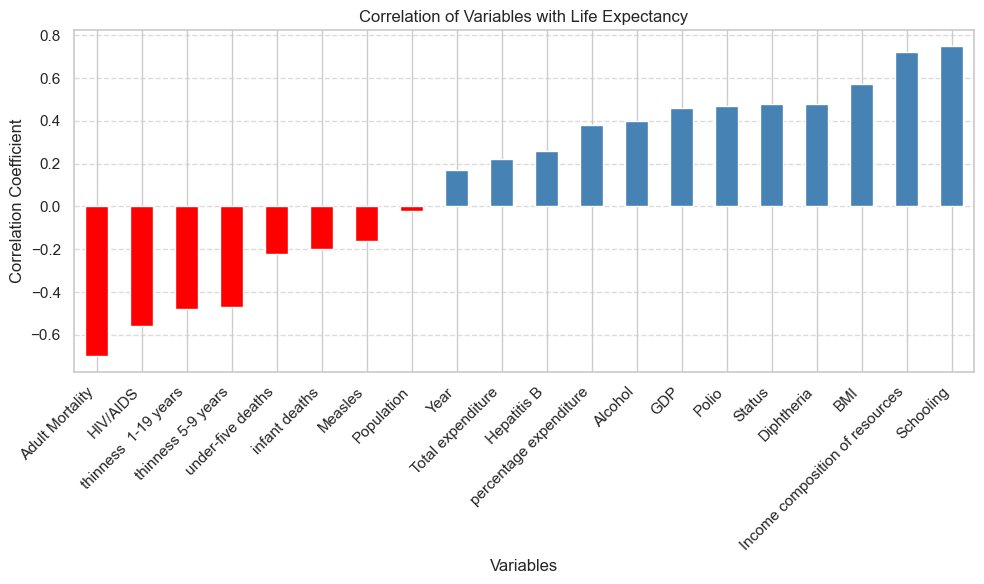

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns like 'Country' and 'Year'
numeric_data = data_encoded.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_data.corr().round(2)

# Extract correlation with Life expectancy
life_expectancy_corr = correlation_matrix['Life expectancy'].drop('Life expectancy').sort_values()

# Set colors: red for negative correlation, blue for positive
colors = ['red' if corr < 0 else 'steelblue' for corr in life_expectancy_corr]

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
life_expectancy_corr.plot(kind='bar', color=colors)
plt.title('Correlation of Variables with Life Expectancy')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Modelling
## Objective
To identify the key predictors of life expectancy globally and explore regional differences between Developed and Developing countries.

Modeling Techniques Selected; - Linear Regression and Descriptive Analysis by Status

5.1 Fitting the linear regression model and evaluating it using R-squared and MSE (Because this is continuous values)

5.2 (Optional Model) Then later use Logistic Regression and Confusion Matrix when categorizing life expectancy to either 'Low'or 'high'

In [32]:
# Fitting the linear regression model and evaluating it using R-squared and MSE 
# Defining features (X) and target (y)

features = [
    'GDP',
    'Total expenditure',
    'Adult Mortality',
    'Diphtheria',
    'HIV/AIDS',
    'BMI',
    'Income composition of resources',
    'Schooling'
]

# Checking for Missing Values 
X = data_encoded[features]
y = data_encoded['Life expectancy']

print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X: 1067
Missing values in y: 10


In [ ]:
# Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Training the model using training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting life expectancy for the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate R-squared (goodness of fit) and MSE (error) on test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")


R² Score: 0.8056906041933303
Mean Squared Error: 18.977497698555624


R-squared Score: 0.806
This means that approximately 81% of the variation in life expectancy can be explained by the selected predictors.

Mean Squared Error (MSE): 18.98
On average, the model’s life expectancy predictions differ from the actual values. 


In [ ]:
# Dropping rows with any missing values in X or y
X = X.dropna()
y = y.loc[X.index]  # Make sure y matches the cleaned X


The linear regression model achieved an R-squared score of 0.81, indicating that 81% of the variance in life expectancy is explained by the selected predictors. The MSE of 18.98 corresponds to an RMSE of approximately 4.36 years, showing the model's moderate-to-high predictive accuracy in estimating life expectancy across countries.

## Assessing the Model

In [38]:
# Check Coefficients & Interpret Feature Importance
# Names and coefficients
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Coefficients sorted by absolute value
print(coefficients)


Income composition of resources    7.862372
Schooling                          0.972380
HIV/AIDS                          -0.492588
Total expenditure                  0.077290
Diphtheria                         0.042757
BMI                                0.041898
Adult Mortality                   -0.016092
GDP                                0.000052
dtype: float64


C:\Users\Kim\AppData\Local\Temp\ipykernel_8240\3168977548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")


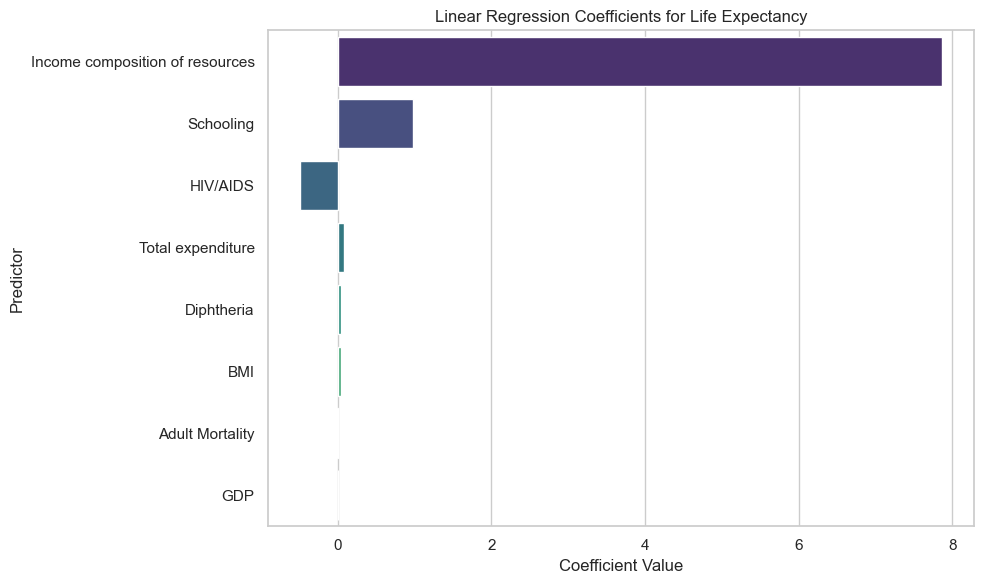

In [39]:
# Visualizations

plt.figure(figsize=(10,6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")
plt.title("Linear Regression Coefficients for Life Expectancy")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictor")
plt.tight_layout()
plt.show()


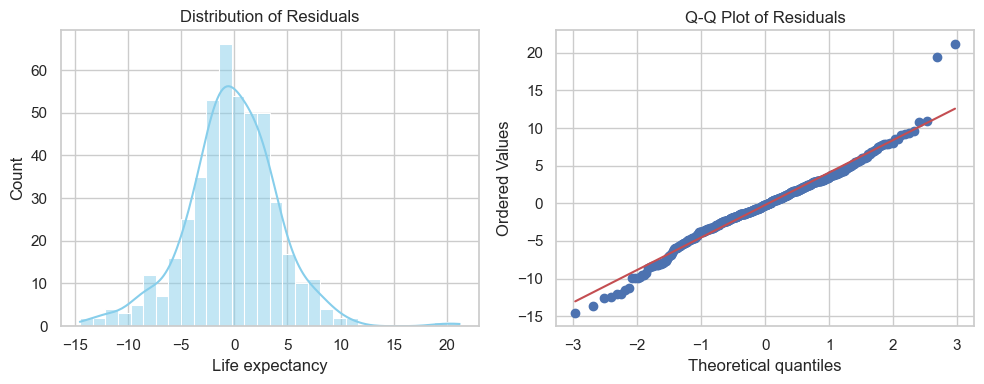

In [40]:
# Model Assumptions
import scipy.stats as stats

# Predicted vs Actual
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Residuals distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.title("Distribution of Residuals")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


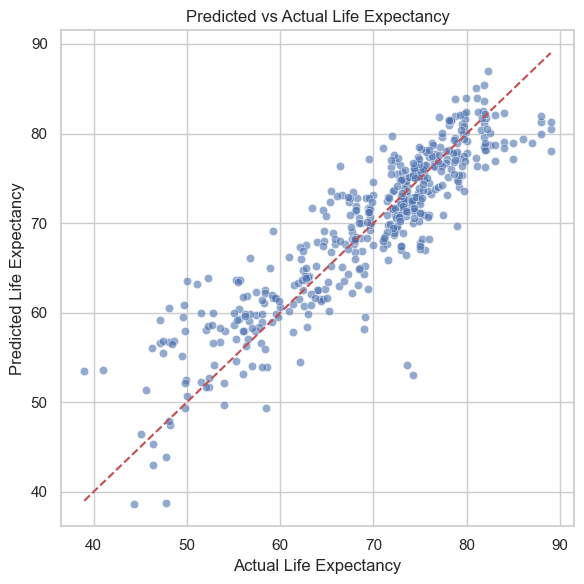

In [41]:
# Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Predicted vs Actual Life Expectancy")
plt.grid(True)
plt.tight_layout()
plt.show()


# Deployment
= Income composition of resources	+7.86 is the strongest positive predictor — better income resources greatly improve life expectancy.

= Schooling	+0.97. More education is associated with longer lives.

= HIV/AIDS	−0.49. Higher prevalence reduces life expectancy.

= Total expenditure	+0.08. Government health spending slightly improves life expectancy.

= Diphtheria	+0.04. Higher vaccination rates linked to longevity.

=BMI	+0.04. Moderate healthy body weight positively affects life.

= Adult Mortality	−0.02. Higher adult mortality lowers life expectancy.

= GDP	+0.00005. Weak positive effect on life expectancy.

# 6. Evaluation
Assessing the performance of the model against the business/research goal and determining whether it truly answers the original question:


Predicting Life Expectancy
Based on the model's performance:

R-squared ≈ 0.81
→ The model explains about 81% of the variance in life expectancy, which is quite strong.

MSE ≈ 19
→ Indicates reasonably low prediction error, considering life expectancy values usually range from ~30 to ~90.

Key Predictors Identified:
→ Income composition, schooling, and HIV/AIDS are strong predictors — these align well with real-world logic.

Visualization Diagnostics:
→ Plots of residuals and predictions suggest no major issues with overfitting or violations of linearity assumptions.

The linear regression model performed well, explaining over 80% of the variance in life expectancy. Key variables like Income Composition, Schooling, and HIV/AIDS prevalence emerged as critical drivers. These findings validate the model’s use in supporting policy decisions and resource allocation in global health and development contexts.

## 5.2 (Optional Model) Trying to work with Logistic Regression and Confusion Matrix
To predict Life Expectancy Category (e.g., Low, Medium, High) instead of a continuous value, using key features like GDP, Adult Mortality, Schooling, etc.

In [42]:
# Converting life expectancy into categorical classes
def categorize_life_expectancy(value):
    if value < 60:
        return 'Low'
    elif value < 75:
        return 'Medium'
    else:
        return 'High'

data['Life_expectancy_cat'] = data['Life expectancy'].apply(categorize_life_expectancy)

# Check category distribution
print(data['Life_expectancy_cat'].value_counts())


Life_expectancy_cat
Medium    1482
High       867
Low        589
Name: count, dtype: int64


In [43]:
# Encode Target Labels
from sklearn.preprocessing import LabelEncoder

# Encode Life_expectancy_cat into numeric labels
label_encoder = LabelEncoder()
data['Life_expectancy_label'] = label_encoder.fit_transform(data['Life_expectancy_cat'])

# Show label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [44]:
# Selecting features x and y
features = [
    'Adult Mortality', 'Alcohol', 'Diphtheria', 'BMI', 'HIV/AIDS',
    'GDP', 'Income composition of resources', 'Schooling', 'Total expenditure'
]

# Define X and y
X = data[features]
y = data['Life_expectancy_label']

# Check for any missing values
print("Missing in X:", X.isnull().sum().sum())
print("Missing in y:", y.isnull().sum())


Missing in X: 1261
Missing in y: 0


In [48]:
# Handling missing values using median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Fit and transform X
X_imputed = imputer.fit_transform(X)

# Converting back to DataFrame to preserve column names
import pandas as pd
X = pd.DataFrame(X_imputed, columns=features)


In [50]:
# Training the Model
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [51]:
# Fit the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Train the model
logreg.fit(X_train, y_train)


C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [52]:
# Predict on test set
y_pred = logreg.predict(X_test)


### Confusion Matrix 

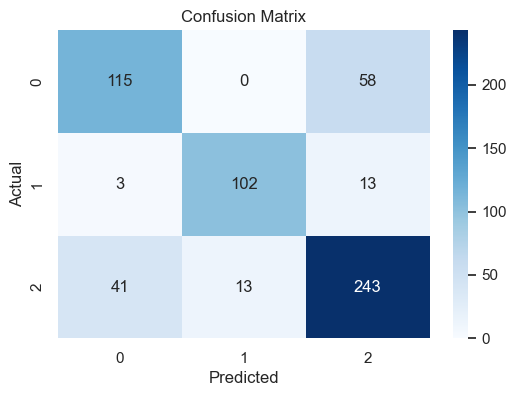

Accuracy Score: 0.7823


In [53]:

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


In [54]:
from sklearn.metrics import classification_report

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       173
           1       0.89      0.86      0.88       118
           2       0.77      0.82      0.80       297

    accuracy                           0.78       588
   macro avg       0.79      0.78      0.79       588
weighted avg       0.78      0.78      0.78       588



### Deployment
The classification model can now be applied in real-world scenarios to support public health planning and interventions. Some practical use cases include:

Targeted Resource Allocation: Use the model to identify populations likely to fall into the Low life expectancy category and direct health services, funding, and education to those regions.

Health Policy Support: Inform national or regional strategies focused on improving key factors such as HIV/AIDS control, education (schooling), and resource equity—which the model identified as most impactful.

NGO and Donor Engagement: Help international agencies and donors pinpoint countries or regions where health investments would yield the greatest improvements in life expectancy.

Early Warning Systems: Deploy the model in dashboards to monitor and flag vulnerable areas in real-time based on changes in predictors like GDP, Adult Mortality, and Diphtheria coverage.

### Evaluation
Model performance was evaluated using accuracy, precision, recall, and F1-score:

Overall accuracy: 78.2% – a strong result for a three-class classification problem.

High performance in identifying Medium and High life expectancy groups.

Lower recall in detecting Low life expectancy indicates room for improvement through better data or additional features.

The evaluation confirms that the model is a valuable tool, especially for broad policy guidance and priority setting. However, it should be complemented with expert input, field data, and local context in final decision-making.